# Ch.4 Exploring categorical data

This notebook contains my work done on the exercises and applications Ch.4 Exploring categorical data of the [Introduction to Modern Statistics Book](https://openintro-ims.netlify.app/index.html).

In [1]:
import pandas as pd
import numpy as np

from pandas.api.types import CategoricalDtype

from collections import defaultdict, Counter

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
import matplotlib.dates as mdates

import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf

import datastats.singlevar as dssv
import datastats.multivar as dsmv
import datastats.hypotest as dsht
import datastats.plotting as dsplt

In [2]:
# Set basic plotting params
dsplt.SetParams()

In [3]:
df = pd.read_csv("datasets/loan50.csv")

In [4]:
df.head()

,state,emp_length,term,homeownership,annual_income,verified_income,debt_to_income,total_credit_limit,total_credit_utilized,num_cc_carrying_balance,loan_purpose,loan_amount,grade,interest_rate,public_record_bankrupt,loan_status,has_second_income,total_income
0,NJ,3.0,60,rent,59000,Not Verified,0.557525,95131,32894,8,debt_consolidation,22000,B,10.90,0,Current,False,59000
1,CA,10.0,36,rent,60000,Not Verified,1.305683,51929,78341,2,credit_card,6000,B,9.92,1,Current,False,60000
2,SC,NaN,36,mortgage,75000,Verified,1.056280,301373,79221,14,debt_consolidation,25000,E,26.30,0,Current,False,75000
3,CA,0.0,36,rent,75000,Not Verified,0.574347,59890,43076,10,credit_card,6000,B,9.92,0,Current,False,75000
4,OH,4.0,60,mortgage,254000,Not Verified,0.238150,422619,60490,2,home_improvement,25000,B,9.43,0,Current,False,254000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   state                    50 non-null     object 
 1   emp_length               48 non-null     float64
 2   term                     50 non-null     int64  
 3   homeownership            50 non-null     object 
 4   annual_income            50 non-null     int64  
 5   verified_income          50 non-null     object 
 6   debt_to_income           50 non-null     float64
 7   total_credit_limit       50 non-null     int64  
 8   total_credit_utilized    50 non-null     int64  
 9   num_cc_carrying_balance  50 non-null     int64  
 10  loan_purpose             50 non-null     object 
 11  loan_amount              50 non-null     int64  
 12  grade                    50 non-null     object 
 13  interest_rate            50 non-null     float64
 14  public_record_bankrupt   50 

In [6]:
df.describe()

,emp_length,term,annual_income,debt_to_income,total_credit_limit,total_credit_utilized,num_cc_carrying_balance,loan_amount,interest_rate,public_record_bankrupt,total_income
count,48.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,4.895833,42.720000,86170.000000,0.722643,208546.640000,61546.540000,5.060000,17083.000000,11.567200,0.080000,105220.560000
std,3.520394,10.885377,57566.498371,0.958264,167514.864327,63778.074324,2.999388,10455.456343,5.052115,0.274048,68141.967716
min,0.000000,36.000000,28800.000000,0.054724,15980.000000,2872.000000,1.000000,3000.000000,5.310000,0.000000,28800.000000
25%,2.000000,36.000000,55750.000000,0.266424,70526.250000,25693.500000,3.000000,7125.000000,7.960000,0.000000,60000.000000
50%,5.000000,36.000000,74000.000000,0.540471,147363.500000,48005.500000,4.000000,15500.000000,9.930000,0.000000,78750.000000
75%,8.250000,60.000000,99500.000000,0.741217,299766.250000,76796.250000,6.000000,24000.000000,13.715000,0.000000,119000.000000
max,10.000000,60.000000,325000.000000,5.333729,793009.000000,373361.000000,14.000000,40000.000000,26.300000,1.000000,325000.000000


In [7]:
list(df.columns)

['state',
 'emp_length',
 'term',
 'homeownership',
 'annual_income',
 'verified_income',
 'debt_to_income',
 'total_credit_limit',
 'total_credit_utilized',
 'num_cc_carrying_balance',
 'loan_purpose',
 'loan_amount',
 'grade',
 'interest_rate',
 'public_record_bankrupt',
 'loan_status',
 'has_second_income',
 'total_income']

In [8]:
# Change the type of the 'grade' category to an ordered categorical variable

# Make a list of grades sorted in reversed order where A is best
grades = df.grade.unique()
grades.sort()
grades_reversed_order = grades[4::-1]

status_type = CategoricalDtype(categories=grades_reversed_order, ordered=True)
df['grade'] = df['grade'].astype(status_type)

df.grade.unique()

['B', 'E', 'D', 'A', 'C']
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']

In [9]:
df.grade.value_counts()

B    19
A    15
D     8
C     6
E     2
Name: grade, dtype: int64

In [10]:
df.homeownership.value_counts()

mortgage    26
rent        21
own          3
Name: homeownership, dtype: int64

In [11]:
df.loan_purpose.value_counts()

debt_consolidation    23
credit_card           13
home_improvement       5
other                  4
car                    2
house                  1
small_business         1
renewable_energy       1
Name: loan_purpose, dtype: int64

In [12]:
df.grade.dtype

CategoricalDtype(categories=['E', 'D', 'C', 'B', 'A'], ordered=True)

In [13]:
# Get indexes for numerical and categorical columns
dtype_series = df.dtypes
numerical_index = dtype_series[(dtype_series == 'int64') | (dtype_series == 'float64')].index
categorical_index = dtype_series[~((dtype_series == 'int64') | (dtype_series == 'float64'))].index

In [14]:
df[numerical_index].head()

,emp_length,term,annual_income,debt_to_income,total_credit_limit,total_credit_utilized,num_cc_carrying_balance,loan_amount,interest_rate,public_record_bankrupt,total_income
0,3.0,60,59000,0.557525,95131,32894,8,22000,10.90,0,59000
1,10.0,36,60000,1.305683,51929,78341,2,6000,9.92,1,60000
2,NaN,36,75000,1.056280,301373,79221,14,25000,26.30,0,75000
3,0.0,36,75000,0.574347,59890,43076,10,6000,9.92,0,75000
4,4.0,60,254000,0.238150,422619,60490,2,25000,9.43,0,254000


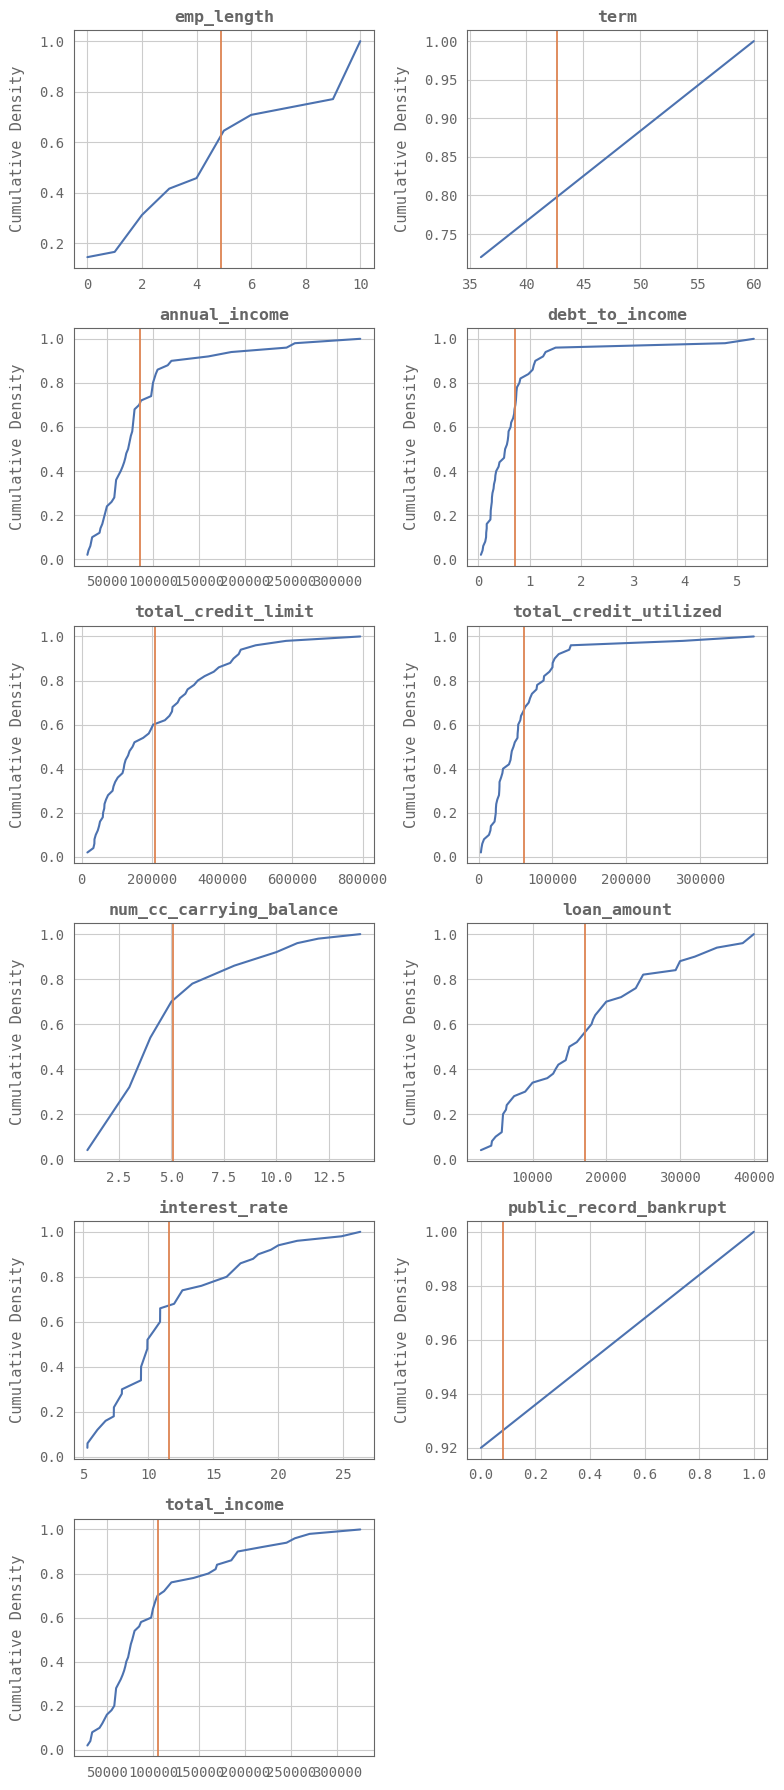

In [15]:
fig, axes = dsplt.AllNumVarDensityPlot(variables=numerical_index, data=df)
axes[5,1].remove()
plt.show()

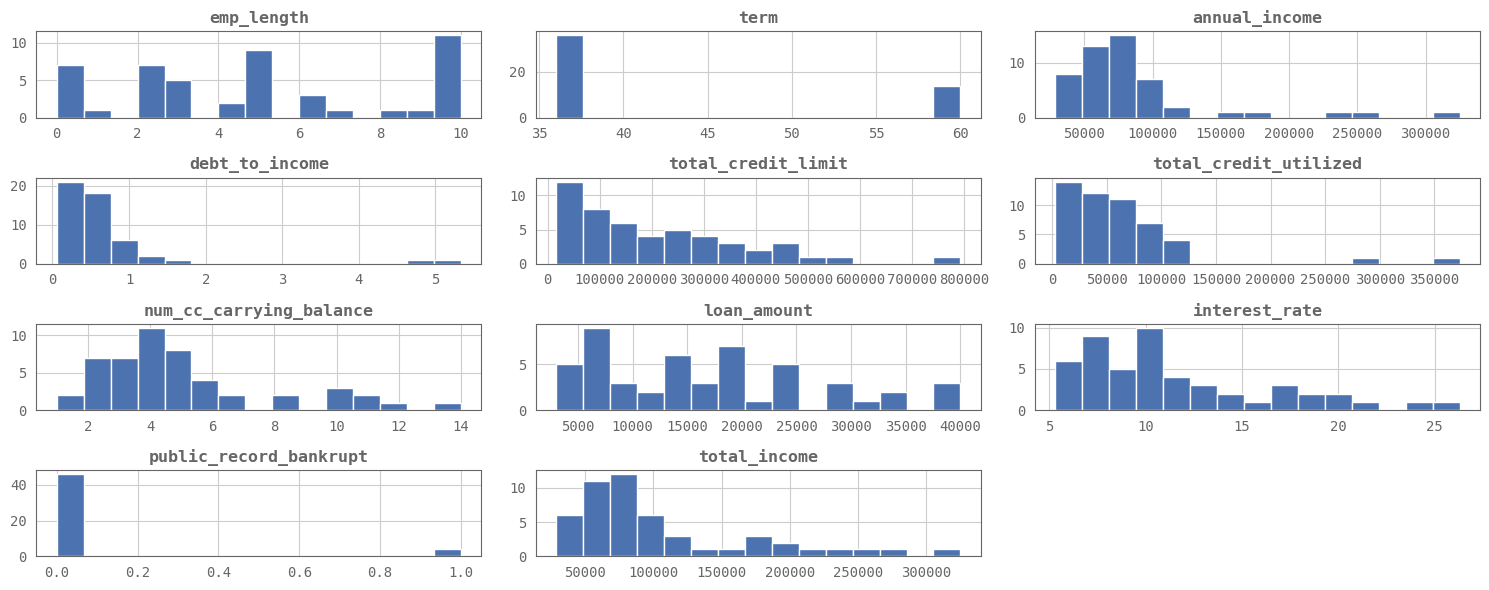

In [16]:
df[numerical_index].hist(bins=15, figsize=(15, 6), layout=(4, 3))
plt.tight_layout()

In [17]:
df[categorical_index].head()

,state,homeownership,verified_income,loan_purpose,grade,loan_status,has_second_income
0,NJ,rent,Not Verified,debt_consolidation,B,Current,False
1,CA,rent,Not Verified,credit_card,B,Current,False
2,SC,mortgage,Verified,debt_consolidation,E,Current,False
3,CA,rent,Not Verified,credit_card,B,Current,False
4,OH,mortgage,Not Verified,home_improvement,B,Current,False


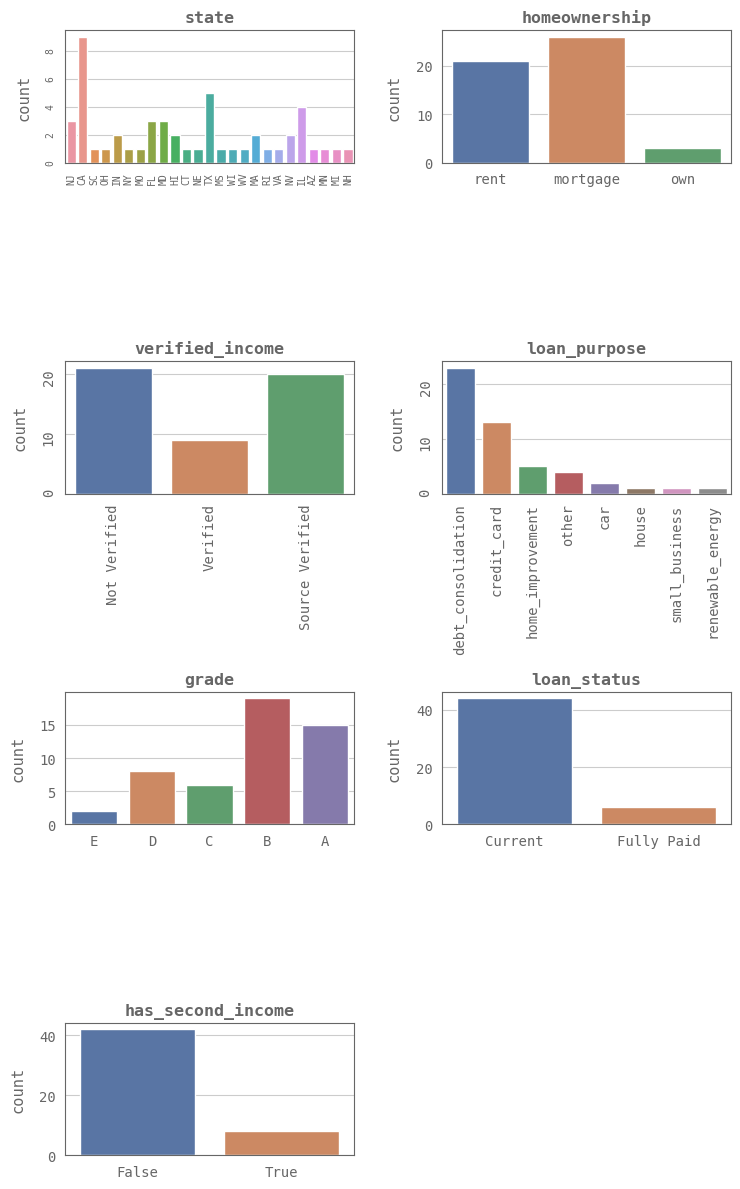

In [18]:
fig, axes = dsplt.AllCatVarCountPlot(variables=categorical_index, data=df)

axes[0,0].tick_params(labelrotation=90)
axes[0,0].tick_params(labelsize=7)
axes[1,0].tick_params(labelrotation=90)
axes[1,1].tick_params(labelrotation=90)

axes[3,1].remove()
    
plt.subplots_adjust(hspace=1.5)

<AxesSubplot: xlabel='loan_amount', ylabel='grade'>

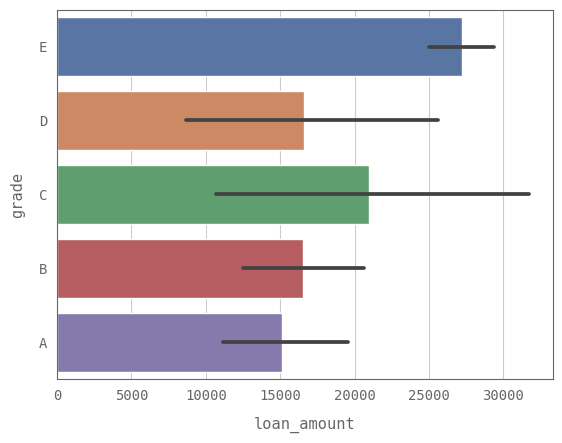

In [19]:
# What is the average loan amount for each grade?
sns.barplot(x="loan_amount", y="grade", data=df)

### Intro to Modern Stats - contingency tables and bar plots

In [20]:
pd.crosstab(index= df['loan_purpose'], columns=df['homeownership'], margins=True)

homeownership,mortgage,own,rent,All
loan_purpose,,,,
car,1,0,1,2
credit_card,6,0,7,13
debt_consolidation,12,3,8,23
home_improvement,5,0,0,5
house,1,0,0,1
other,1,0,3,4
renewable_energy,0,0,1,1
small_business,0,0,1,1
All,26,3,21,50


<AxesSubplot: xlabel='homeownership', ylabel='count'>

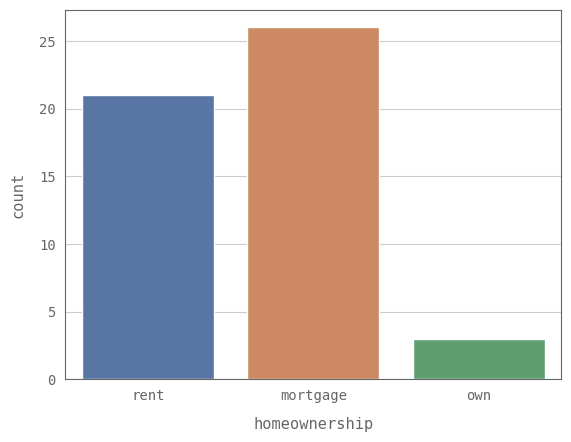

In [21]:
sns.countplot(x='homeownership', data=df)

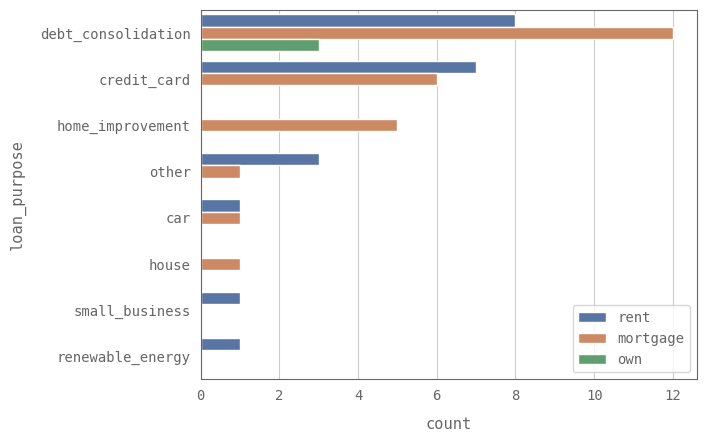

In [22]:
g = sns.countplot(y='loan_purpose', hue='homeownership', data=df)

g.legend(loc='lower right')

(0.0, 100.0)

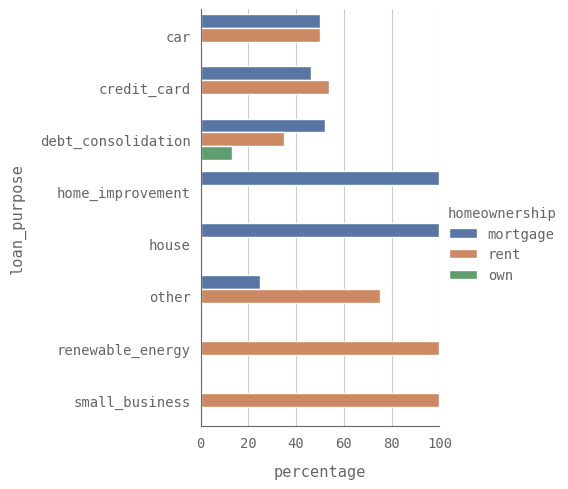

In [23]:
# Try the same chart as above using proportions/percentages
y,hue = 'loan_purpose','homeownership'
df1 = (df.groupby(y)[hue]
       .value_counts(normalize=True)
       .mul(100)
       .rename('percentage')
       .reset_index()
       .rename(columns={'level_1':hue}))
g = sns.catplot(y=y, x='percentage', hue=hue, kind='bar', data=df1)
g.ax.set_xlim(0,100)

### Recreate the different kinds of bar plots in figure 4.2
Will use grade and homeownership as the variables instead since we don't have application type

In [24]:
# First create the crosstab that will hold the data and get the grade and homeownership indexes
cross_tab = pd.crosstab(df.grade, df.homeownership)

cross_tab_grade_indexes = cross_tab.index
cross_tab_homeownership_indexes = cross_tab.columns

cross_tab

homeownership,mortgage,own,rent
grade,,,
E,2,0,0
D,3,1,4
C,4,1,1
B,10,1,8
A,7,0,8


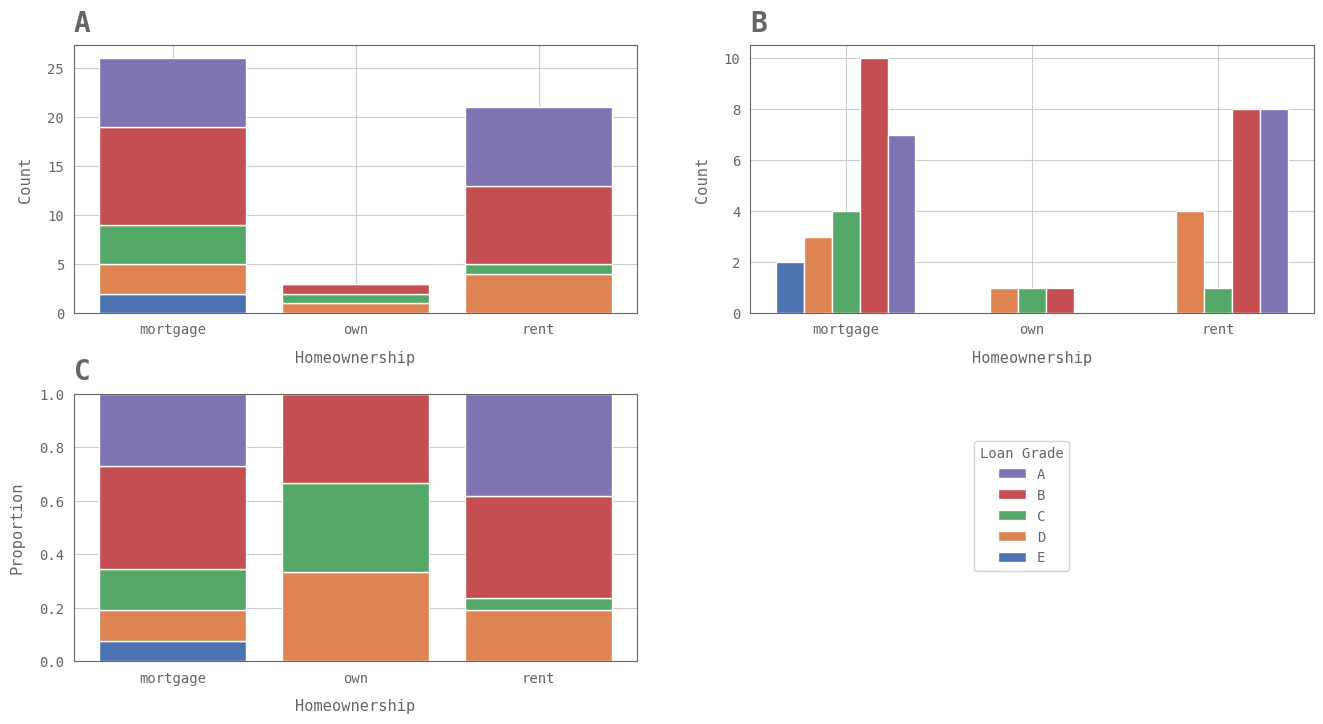

In [25]:
# Build the charts

# First build the data sequences for the charts

# bar locations, 3 homeownership types
bar_locs = range(0,3)

# bar heights
grade_E_bars = cross_tab.loc[cross_tab_grade_indexes[0]]
grade_D_bars = cross_tab.loc[cross_tab_grade_indexes[1]]
grade_C_bars = cross_tab.loc[cross_tab_grade_indexes[2]]
grade_B_bars = cross_tab.loc[cross_tab_grade_indexes[3]]
grade_A_bars = cross_tab.loc[cross_tab_grade_indexes[4]]

# Set up figure (multiple plots, 2 columns)
fig,axes = plt.subplots(ncols=2, nrows=2)
fig.set_size_inches(16,8)

# Stacked bar chart

axes[0,0].bar(x=bar_locs, height=grade_E_bars)
axes[0,0].bar(x=bar_locs, height=grade_D_bars, 
              bottom=grade_E_bars)
axes[0,0].bar(x=bar_locs, height=grade_C_bars,
              bottom=grade_E_bars + grade_D_bars)
axes[0,0].bar(x=bar_locs, height=grade_B_bars,
              bottom=grade_E_bars + grade_D_bars + grade_C_bars)
axes[0,0].bar(x=bar_locs, height=grade_A_bars,
              bottom=grade_E_bars + grade_D_bars + grade_C_bars + grade_B_bars)

axes[0,0].set_title(label='A', loc='left', pad=10, size=20)
axes[0,0].set_xlabel(xlabel="Homeownership")
axes[0,0].set_ylabel(ylabel="Count")
axes[0,0].set_xticks(range(0,3))
axes[0,0].set_xticklabels(cross_tab_homeownership_indexes)

# Dodged bar chart

bar_width = 0.15

axes[0,1].bar(x=np.array(bar_locs)-2*bar_width, height=grade_E_bars, width=bar_width)
axes[0,1].bar(x=np.array(bar_locs)-bar_width, height=grade_D_bars, width=bar_width)
axes[0,1].bar(x=bar_locs, height=grade_C_bars, width=bar_width)
axes[0,1].bar(x=np.array(bar_locs)+bar_width, height=grade_B_bars, width=bar_width)
axes[0,1].bar(x=np.array(bar_locs)+2*bar_width, height=grade_A_bars, width=bar_width)

axes[0,1].set_title(label='B', loc='left', pad=10, size=20)
axes[0,1].set_xlabel(xlabel="Homeownership")
axes[0,1].set_ylabel(ylabel="Count")
axes[0,1].set_xticks(range(0,3))
axes[0,1].set_xticklabels(cross_tab_homeownership_indexes)

# Filled bar chart

# Need a crosstab normalized down the columns
cross_tab_normalized = pd.crosstab(df.grade, df.homeownership, normalize='columns')

# And new bars
grade_E_bars_normalized = cross_tab_normalized.loc[cross_tab_grade_indexes[0]]
grade_D_bars_normalized = cross_tab_normalized.loc[cross_tab_grade_indexes[1]]
grade_C_bars_normalized = cross_tab_normalized.loc[cross_tab_grade_indexes[2]]
grade_B_bars_normalized = cross_tab_normalized.loc[cross_tab_grade_indexes[3]]
grade_A_bars_normalized = cross_tab_normalized.loc[cross_tab_grade_indexes[4]]

axes[1,0].bar(x=bar_locs, height=grade_E_bars_normalized, label='E')
axes[1,0].bar(x=bar_locs, height=grade_D_bars_normalized, label='D', 
              bottom=grade_E_bars_normalized)
axes[1,0].bar(x=bar_locs, height=grade_C_bars_normalized, label='C',
              bottom=grade_E_bars_normalized + grade_D_bars_normalized)
axes[1,0].bar(x=bar_locs, height=grade_B_bars_normalized, label='B',
              bottom=grade_E_bars_normalized + grade_D_bars_normalized + grade_C_bars_normalized)
axes[1,0].bar(x=bar_locs, height=grade_A_bars_normalized, label='A',
              bottom=grade_E_bars_normalized + grade_D_bars_normalized + grade_C_bars_normalized + grade_B_bars_normalized)

axes[1,0].set_title(label='C', loc='left', pad=10, size=20)
axes[1,0].set_xlabel(xlabel="Homeownership")
axes[1,0].set_ylabel(ylabel="Proportion")
axes[1,0].set_xticks(range(0,3))
axes[1,0].set_xticklabels(cross_tab_homeownership_indexes)

# Get rid of axis #4 and add legend in its place

dsplt.Despine(axes[1,1], spines='all')
axes[1,1].xaxis.set_visible(False)
axes[1,1].yaxis.set_visible(False)

# Remove the bottom right corner axis from the figure so the legend can be moved there
axes[1,1].remove()

# Add a legend with reversed label order
handles, labels = axes[1,0].get_legend_handles_labels()
axes[1,0].legend(handles[::-1], labels[::-1], frameon=True, bbox_to_anchor=(1.585,.85), loc="upper left",
                 title='Loan Grade')

plt.subplots_adjust(hspace=0.3)

In [26]:
print(plt.rcParams['axes.prop_cycle'].by_key()['color'])

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), (0.8666666666666667, 0.5176470588235295, 0.3215686274509804), (0.3333333333333333, 0.6588235294117647, 0.40784313725490196), (0.7686274509803922, 0.3058823529411765, 0.3215686274509804), (0.5058823529411764, 0.4470588235294118, 0.7019607843137254), (0.5764705882352941, 0.47058823529411764, 0.3764705882352941), (0.8549019607843137, 0.5450980392156862, 0.7647058823529411), (0.5490196078431373, 0.5490196078431373, 0.5490196078431373), (0.8, 0.7254901960784313, 0.4549019607843137), (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]


### Recreate the proportion contingency tables in section 4.3
Will use grade since we don't have application type

In [27]:
# Row proportions
pd.crosstab(df.grade, df.homeownership, normalize='index')

homeownership,mortgage,own,rent
grade,,,
E,1.000000,0.000000,0.000000
D,0.375000,0.125000,0.500000
C,0.666667,0.166667,0.166667
B,0.526316,0.052632,0.421053
A,0.466667,0.000000,0.533333


In [28]:
# Column proportions
pd.crosstab(df.grade, df.homeownership, normalize='columns')

homeownership,mortgage,own,rent
grade,,,
E,0.076923,0.000000,0.000000
D,0.115385,0.333333,0.190476
C,0.153846,0.333333,0.047619
B,0.384615,0.333333,0.380952
A,0.269231,0.000000,0.380952


In [29]:
# Only three ownership cases
df.homeownership.value_counts()

mortgage    26
rent        21
own          3
Name: homeownership, dtype: int64

### Email example

In [30]:
df_email = pd.read_csv('datasets/email.csv')
df_email.head()

,spam,to_multiple,from,cc,sent_email,time,image,attach,dollar,winner,...,viagra,password,num_char,line_breaks,format,re_subj,exclaim_subj,urgent_subj,exclaim_mess,number
0,0,0,1,0,0,2012-01-01T06:16:41Z,0,0,0,no,...,0,0,11.370,202,1,0,0,0,0,big
1,0,0,1,0,0,2012-01-01T07:03:59Z,0,0,0,no,...,0,0,10.504,202,1,0,0,0,1,small
2,0,0,1,0,0,2012-01-01T16:00:32Z,0,0,4,no,...,0,0,7.773,192,1,0,0,0,6,small
3,0,0,1,0,0,2012-01-01T09:09:49Z,0,0,0,no,...,0,0,13.256,255,1,0,0,0,48,small
4,0,0,1,0,0,2012-01-01T10:00:01Z,0,0,0,no,...,0,2,1.231,29,0,0,0,0,1,none


In [31]:
df_email.columns

Index(['spam', 'to_multiple', 'from', 'cc', 'sent_email', 'time', 'image',
       'attach', 'dollar', 'winner', 'inherit', 'viagra', 'password',
       'num_char', 'line_breaks', 'format', 're_subj', 'exclaim_subj',
       'urgent_subj', 'exclaim_mess', 'number'],
      dtype='object')

In [32]:
pd.crosstab(df_email.spam, df_email.format)

format,0,1
spam,,
0,986,2568
1,209,158


### Section 4.6 - numerical data across groups

In [33]:
df_county = pd.read_csv('datasets/county.csv')
df_county

,name,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,per_capita_income,median_hh_income,smoking_ban
0,Autauga County,Alabama,43671.0,54571,55504.0,1.48,13.7,77.5,7.2,3.86,yes,some_college,27841.70,55317.0,none
1,Baldwin County,Alabama,140415.0,182265,212628.0,9.19,11.8,76.7,22.6,3.99,yes,some_college,27779.85,52562.0,none
2,Barbour County,Alabama,29038.0,27457,25270.0,-6.22,27.2,68.0,11.1,5.90,no,hs_diploma,17891.73,33368.0,partial
3,Bibb County,Alabama,20826.0,22915,22668.0,0.73,15.2,82.9,6.6,4.39,yes,hs_diploma,20572.05,43404.0,none
4,Blount County,Alabama,51024.0,57322,58013.0,0.68,15.6,82.0,3.7,4.02,yes,hs_diploma,21367.39,47412.0,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,Sweetwater County,Wyoming,37613.0,43806,43534.0,-3.57,12.0,73.7,14.6,4.55,no,some_college,30282.59,71083.0,none
3138,Teton County,Wyoming,18251.0,21294,23265.0,4.21,6.8,60.8,31.9,2.99,no,bachelors,48557.37,80049.0,partial
3139,Uinta County,Wyoming,19742.0,21118,20495.0,-2.22,14.9,73.7,17.0,4.50,no,some_college,27048.12,54672.0,none
3140,Washakie County,Wyoming,8289.0,8533,8064.0,-4.31,12.8,70.9,10.0,4.08,no,some_college,27494.83,51362.0,none


In [34]:
# Add a gain column that categorizes the counties according to whether they gained or lost population from 2010 to 2017
df_county['gain'] = np.nan

# Get indexes for counties that have population gains
county_gain_indexes = df_county.loc[df_county.pop2017 - df_county.pop2010 > 0].index

# Set the gain values to True for those indexes
df_county.loc[county_gain_indexes, 'gain'] = 'Gain'

# Get indexes for counties that population decreases or stayed the same
county_no_gain_indexes = df_county.loc[df_county.pop2017 - df_county.pop2010 <= 0].index

# Set the gain values to False for those indexes
df_county.loc[county_no_gain_indexes, 'gain'] = 'No Gain'

<AxesSubplot: xlabel='median_hh_income', ylabel='Count'>

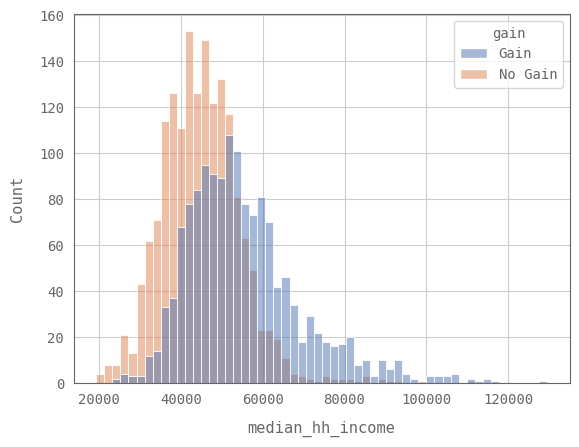

In [35]:
sns.histplot(data=df_county, x='median_hh_income', hue='gain')

In [36]:
# Remove the entries where the gain is NaN
df_county = df_county[~df_county.gain.isna()]

# Remove the entries where the median_hh_income is NaN
df_county = df_county[~df_county.median_hh_income.isna()]

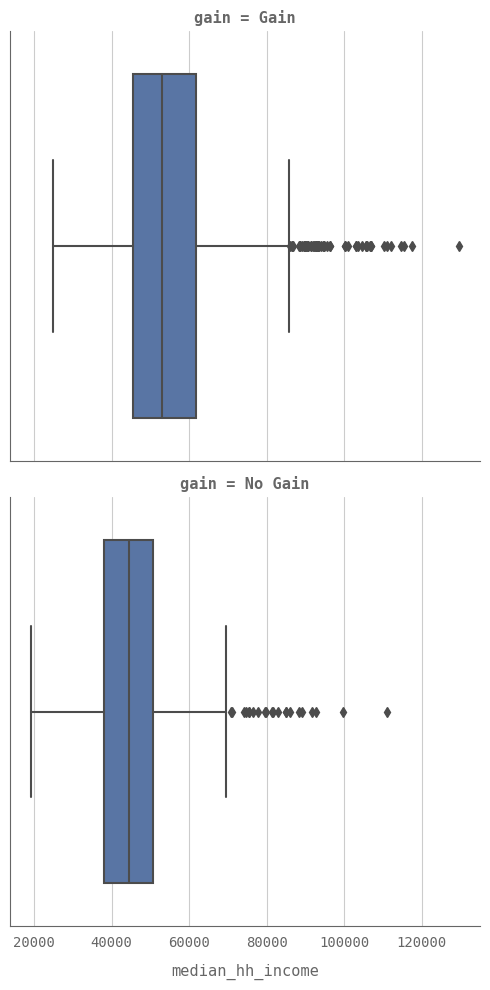

In [37]:
sns.catplot(data=df_county, x = 'median_hh_income', row='gain', kind='box')

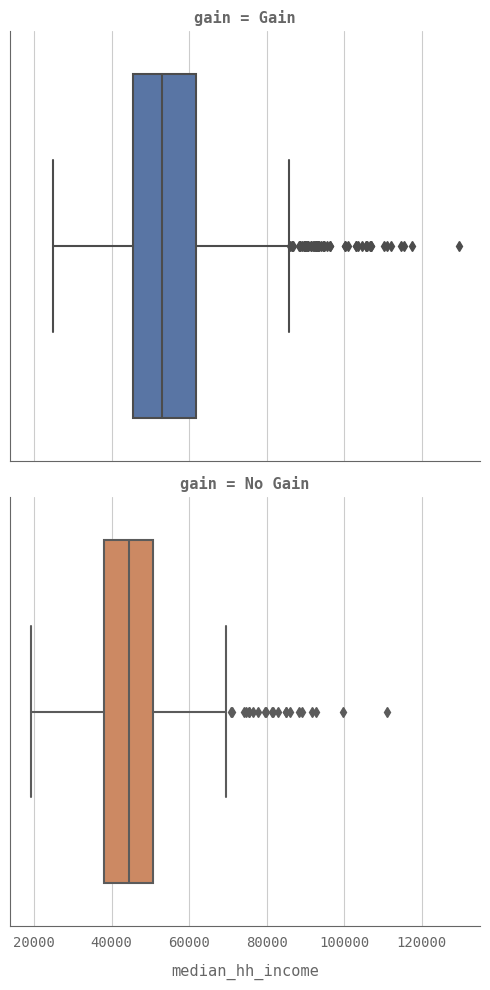

In [38]:
# Attempt at making the colors different using method introduced on page below:
# https://github.com/mwaskom/seaborn/issues/915

def fixed_boxplot(x, *args, label=None, **kwargs):
    sns.boxplot(x=x, *args, **kwargs, labels=[label])

g = sns.FacetGrid(df_county, row='gain', hue='gain', height=5)
g.map(fixed_boxplot, 'median_hh_income')

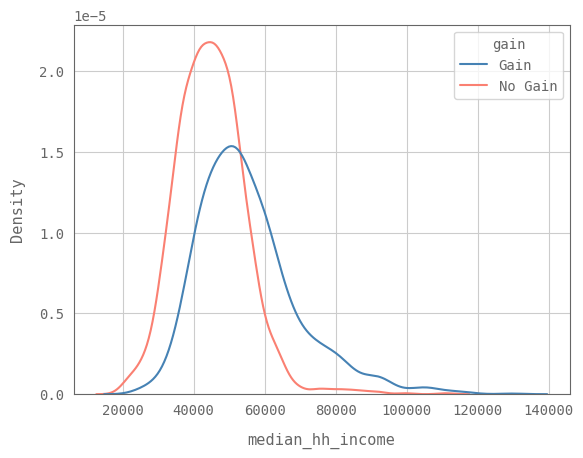

In [39]:
# Ridge plot example

g = sns.kdeplot(data=df_county, x='median_hh_income', hue='gain', 
                palette = sns.color_palette(palette = ["SteelBlue" , "Salmon"]))

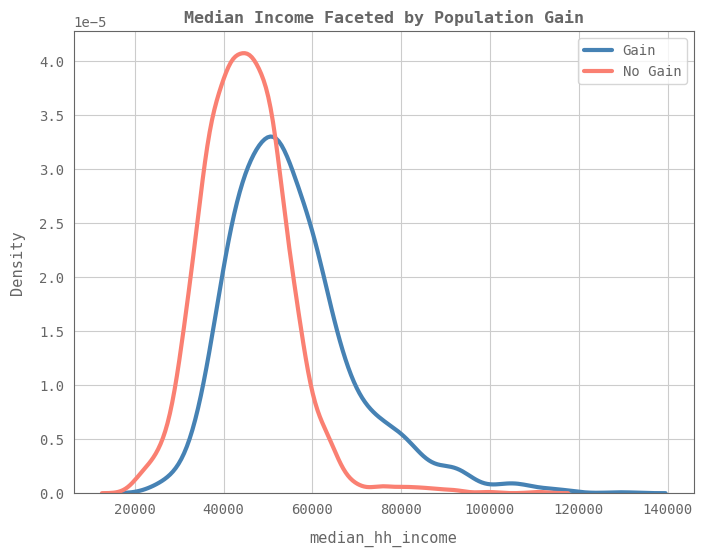

In [40]:
# Ridge plot example
# Try to do it separately to enable removing of the legend title

# Build separate dataframes
df_county_gain = df_county[df_county.gain == "Gain"]
df_county_no_gain = df_county[~(df_county.gain == "Gain")]

fig,ax = plt.subplots()
fig.set_size_inches(8,6)

sns.kdeplot(data=df_county_gain, x='median_hh_income', label = "Gain", ax=ax, lw=3,
            color = "SteelBlue" )
sns.kdeplot(data=df_county_no_gain, x='median_hh_income', label = "No Gain", ax=ax, lw=3,
            color = "Salmon")

ax.legend()
ax.set_title('Median Income Faceted by Population Gain')

plt.show()

Faceting examples in the book

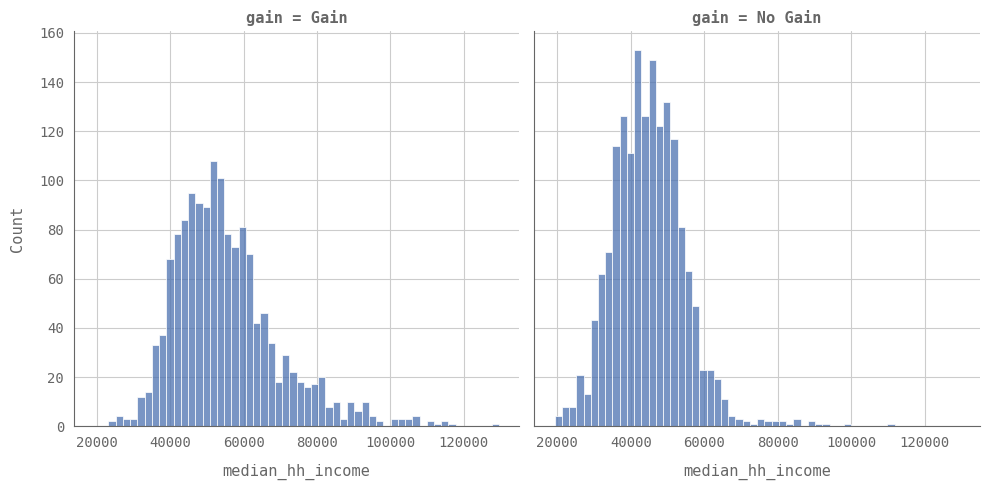

In [41]:
sns.displot(x='median_hh_income', col='gain', data=df_county, kind='hist')

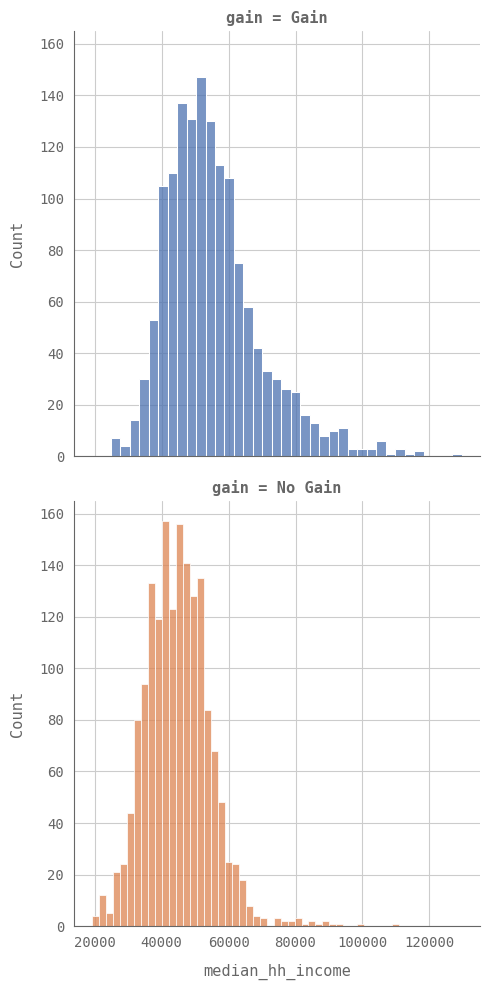

In [42]:
g = sns.FacetGrid(df_county, row='gain', hue='gain', height=5)
g.map(sns.histplot, 'median_hh_income')

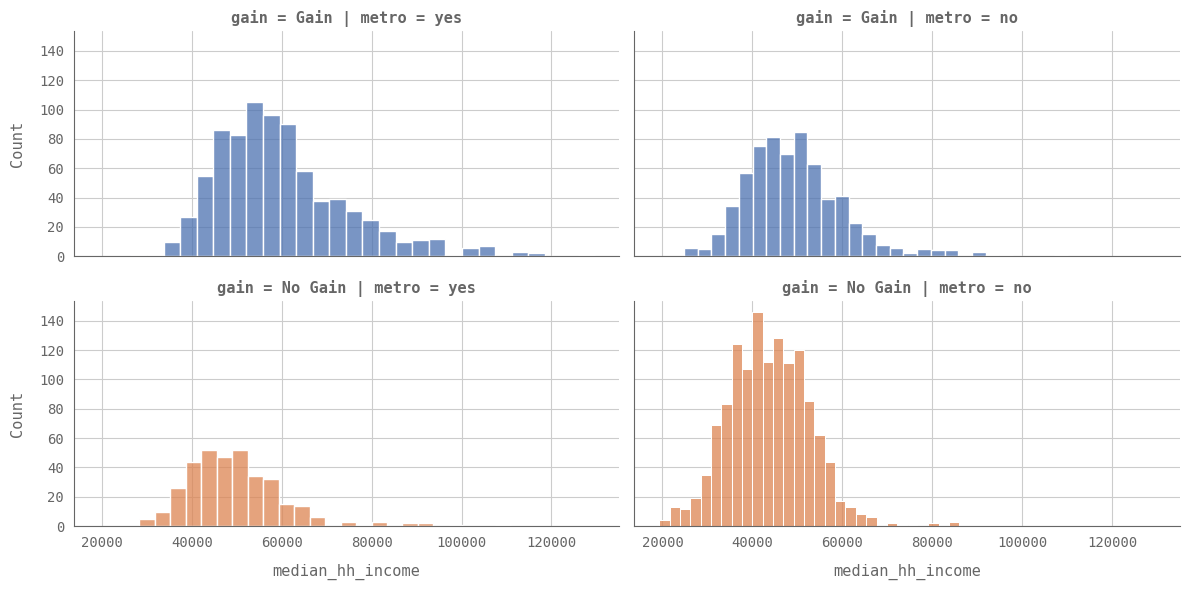

In [43]:
g = sns.FacetGrid(df_county, row='gain', col= 'metro', hue='gain', height=3, aspect=2)
g.map(sns.histplot, 'median_hh_income')

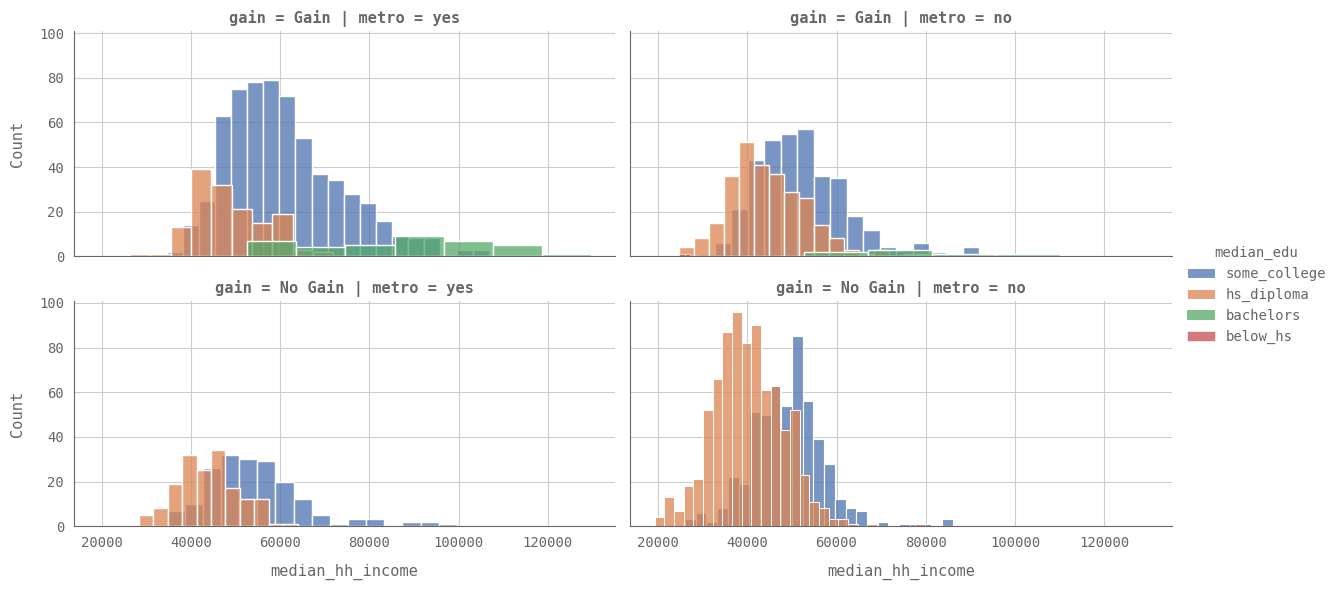

In [44]:
g = sns.FacetGrid(df_county, row='gain', col= 'metro', hue='median_edu', height=3, aspect=2)
g.map(sns.histplot, 'median_hh_income')

g.add_legend()

### Exercises

1.

What features are apparent in the bar plot but not in the pie chart?  
The relative values for the different conditions

What features are apparent in the pie chart but not in the bar plot?  
Not much if anything

Which graph would you prefer to use for displaying these categorical data?  
bar chart


2.

What percent of these Tampa, FL voters identify themselves as conservatives?  
372/910

What percent of these Tampa, FL voters are in favor of the citizenship option?  
278/910

What percent of these Tampa, FL voters identify themselves as conservatives and are in favor of the citizenship option?  
57/910

What percent of these Tampa, FL voters who identify themselves as conservatives are also in favor of the citizenship option?  
57/372  
What percent of moderates share this view?   
120/363  
What percent of liberals share this view?  
101/175

Do political ideology and views on immigration appear to be associated? Explain your reasoning.  
Yes, because the number of people who agree with the citizenship option differs across the political ideologies and the differences are large enough that they don't appear to be random.

Conjecture other possible variables that might explain the potential relationship between these two variables.  
The type of work people do might be a confounding variable that affects both the political ideology of the voters and how they feel about immigration. People who work in jobs that are threatened by immigration could be more likely to identify with a certain ideology and also have certain views about immigration.


3.

Based on the stacked bar plot, do views on the protests and age appear to be associated? Explain your reasoning.  
Yes, support for the protests appears to be negatively correlated with age.

Conjecture other possible variables that might explain the potential association between these two variables.  
Political association could also explain the apparent association because younger people might hold more liberal views.
How much wealth people have could be another potential explanatory variable. Older people are likely to be wealthier and want to protect the status quo, whereas younger people might want to push for more change and opportunity for all people.


4.

Based on the stacked bar plot shown above, do views on raising taxes and political affiliation appear to be associated? Explain your reasoning.  
Yes, there is a large difference in opinion between democrats and other political groups that does not appear to be random.

Conjecture other possible variables that might explain the potential association between these two variables.  
It's possible that the vast majority of democratic voters are low income and other party affiations are higher income. This would make income a variable that could affect the apparent relationship.


5.

Provide one aspect of the two-group comparison that is easier to see from the stacked bar plot (left)?  
This chart shows the count of patients in each group

Provide one aspect of the two-group comparison that is easier to see from the standardized bar plot (right)?  
This chart shows the proportion of patients in each group

For the Heart Transplant Study which of those aspects would be more important to display? That is, which bar plot would be better as a data visualization?  
standardized bar plot


6.

Which graph (top or bottom) would you use to understand the shipping choices of people of different ages?  
bottom

Which graph (top or bottom) would you use to understand the age distribution across different types of shipping choices?  
top

A new shipping company would like to market to people over the age of 55. Who will be their biggest competitor?  
USPS

FedEx would like to reach out to grow their market share to balance the age demographics of FedEx users. To what age group should FedEx market?  
55 plus